<a href="https://colab.research.google.com/github/Senbonsakurakageyoshi1/Senbonsakurakageyoshi1/blob/main/Signature_Recognition_Using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pdf2image

In [4]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

     |████████████████████████████████| 60.5 MB 1.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [7]:
from pdf2image import convert_from_path
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
#images = convert_from_path('/content/in1.jpg',output_folder='/content/')
images = cv2.imread('/content/in1.jpg')


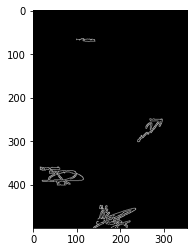

In [8]:
img = np.array(images)
original = img.copy()
ratio = img.shape[0]/500.0
img = imutils.resize(img,height=500)
orig = img.copy()
#converting to grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(gray,'gray')
edged = cv2.Canny(gray,400,80)
cv2.imwrite('/content/senbon.png',edged)
plt.imshow(edged,'gray')

True

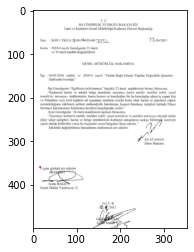

In [30]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key= cv2.contourArea, reverse=True)[:1]
for c in cnts:
 peri = cv2.arcLength(c,True)
 apprx = cv2.approxPolyDP(c, 0.2*peri, True)
 x,y,w,h = cv2.boundingRect(apprx)
 cv2.rectangle(orig,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(orig)
cv2.imwrite('pain.png',orig)

In [31]:
cnts,hierachy = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.imwrite('contour.png',cv2.drawContours(img, cnts, -1, (0,255,0), 10))


True

In [ ]:
x,y,w,h = cv2.boundingRect(cnts)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)